In [1]:
import enum
import seaborn as sns
from data_handling.Data_Processor import DataProcessor
import constants
import os
from statistics_methods.Statistics import StatisticsWrapper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [2]:
raw_data_path = constants.PATH_TO_CORTEX_4_PARAMS_RAW
chosen_rois_dict = constants.ROI_CORTEX
params_to_work_with = ['r1', 'tv', 'mt', 'r2s']

In [3]:
subjects_raw_data = DataProcessor(raw_data_path, chosen_rois_dict, chosen_rois_dict).get_data_proccessed()
analyzed_data = StatisticsWrapper.calc_mean_per_subject_per_parameter_per_ROI(subjects_raw_data, params_to_work_with)
chosen_data = StatisticsWrapper.chose_relevant_data(analyzed_data, chosen_rois_dict, params_to_work_with, params_to_work_with)

In [4]:
group_a_name, group_b_name, col_divider, threshold = constants.YOUNG, constants.OLD, 'Age', constants.AGE_THRESHOLD
young_subjects, old_subjects = StatisticsWrapper.seperate_data_to_two_groups(chosen_data, col_divider, threshold)

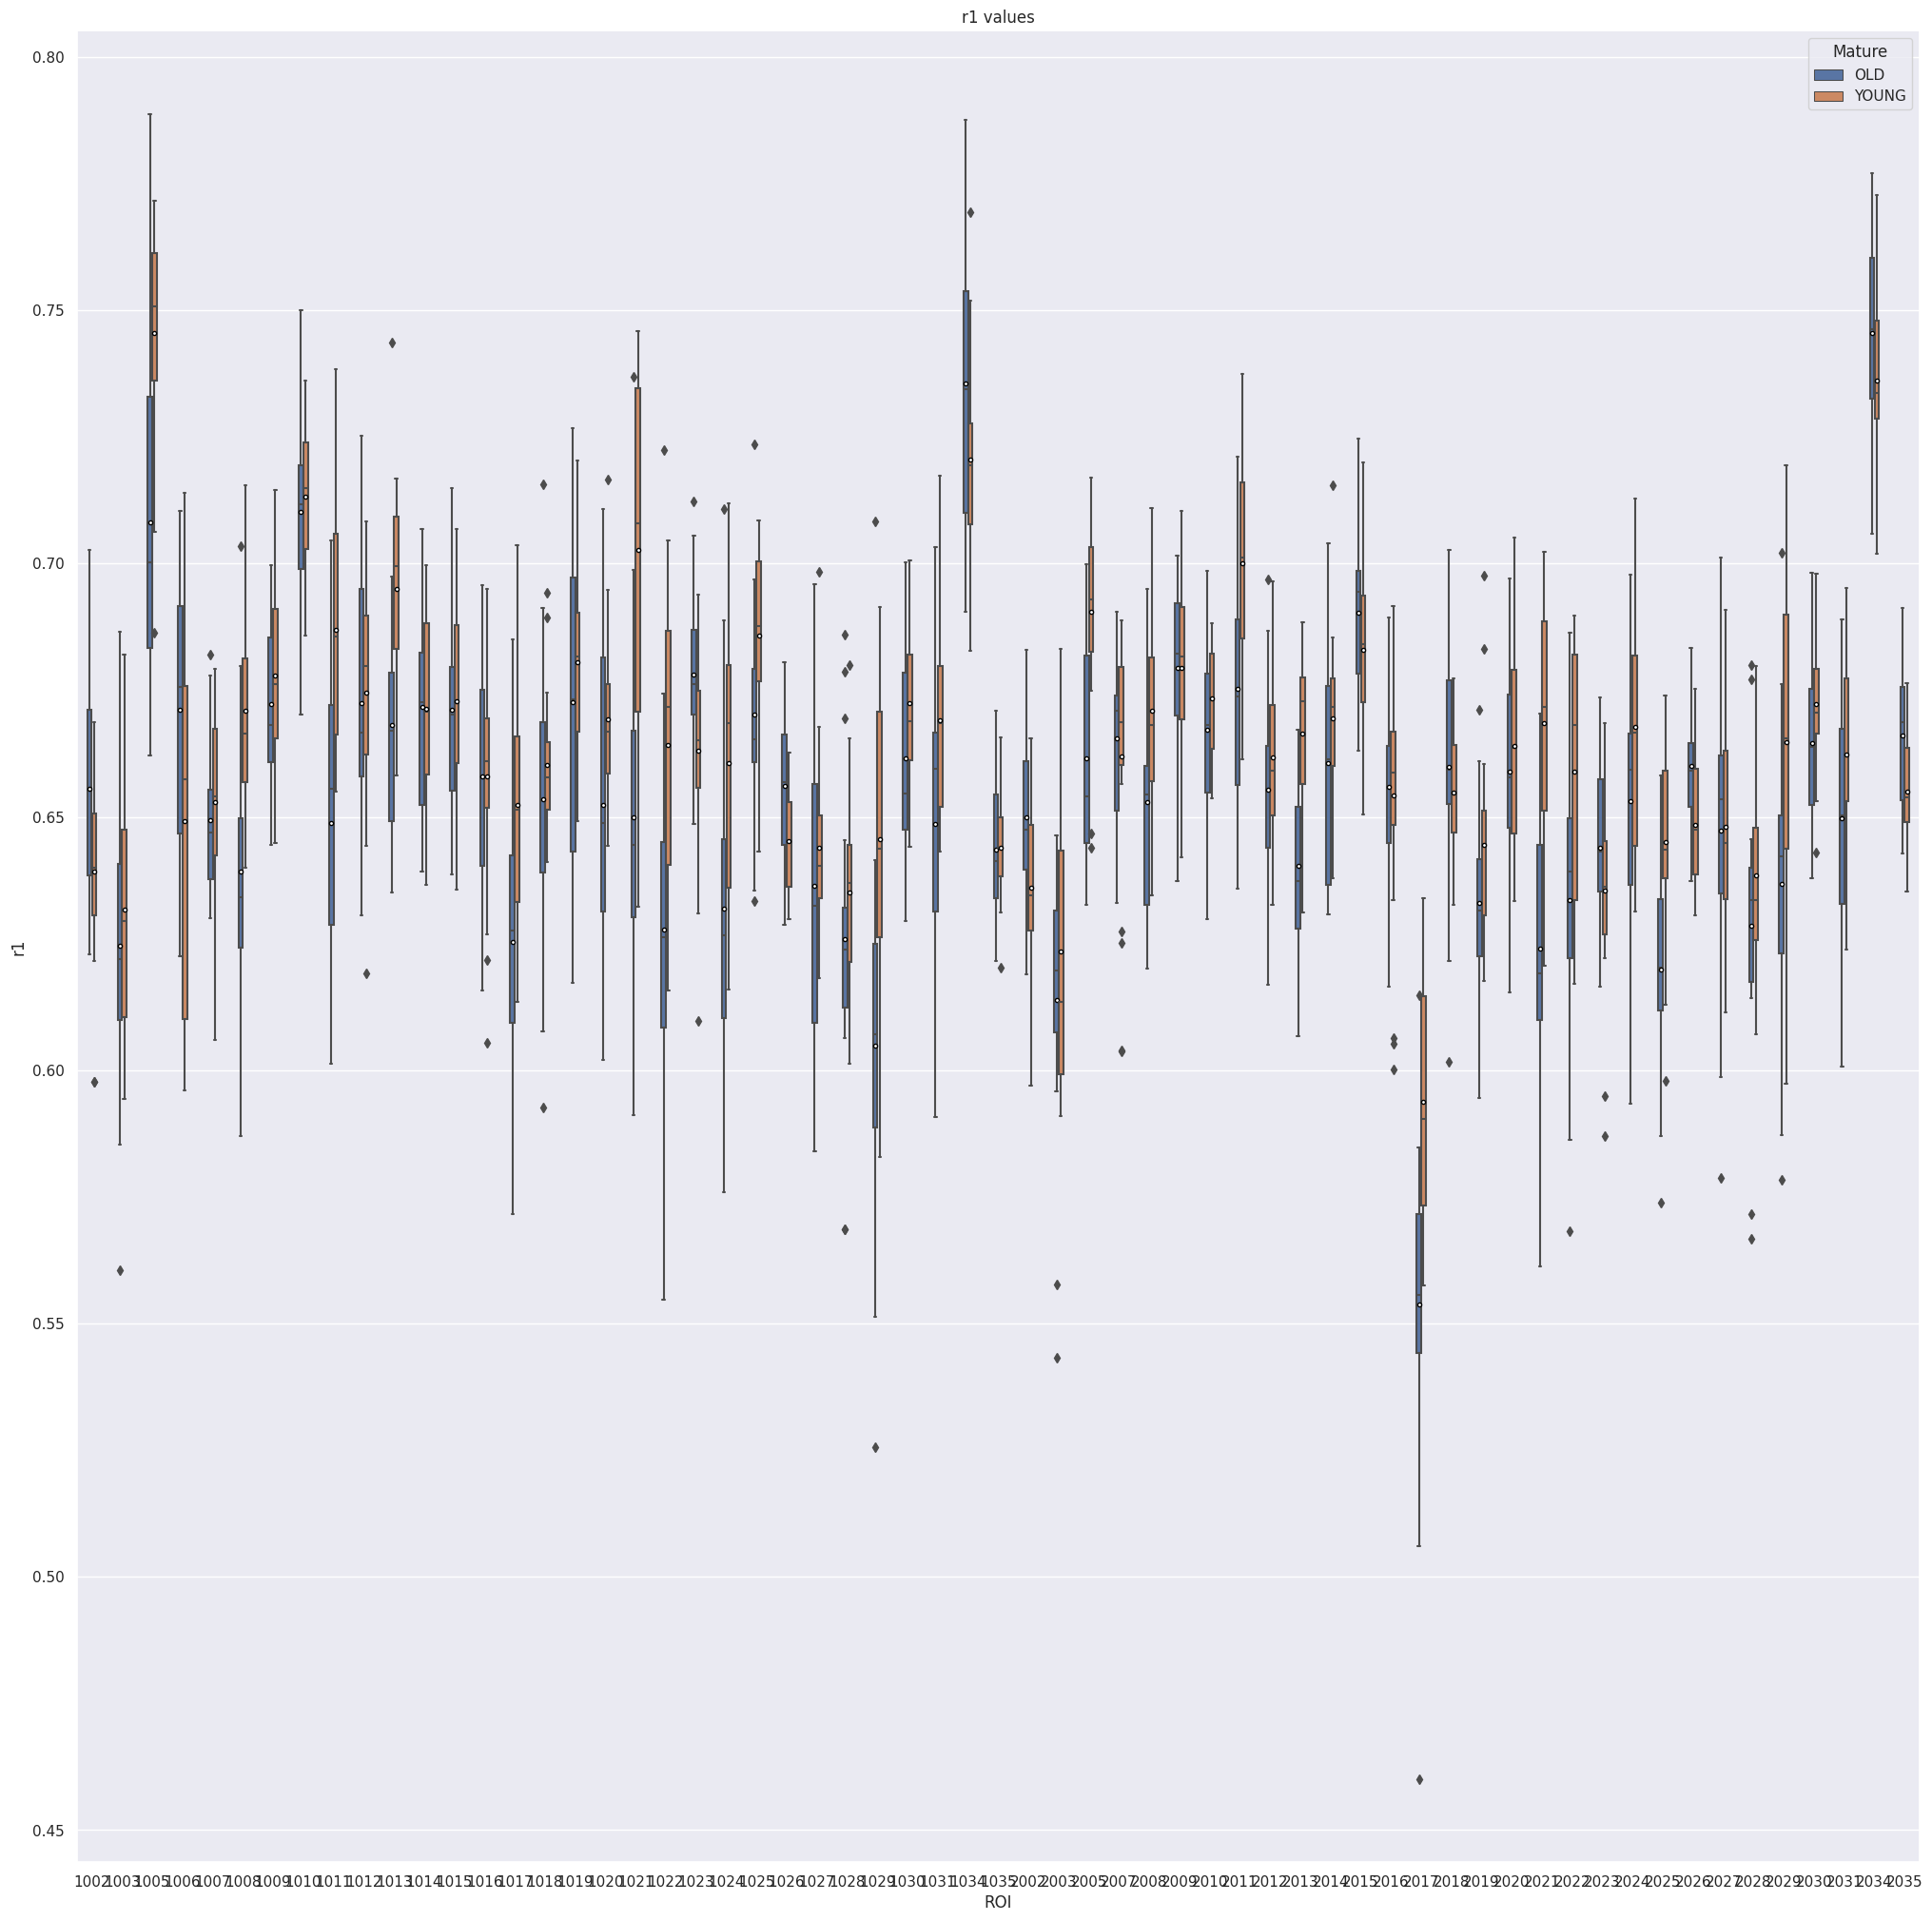

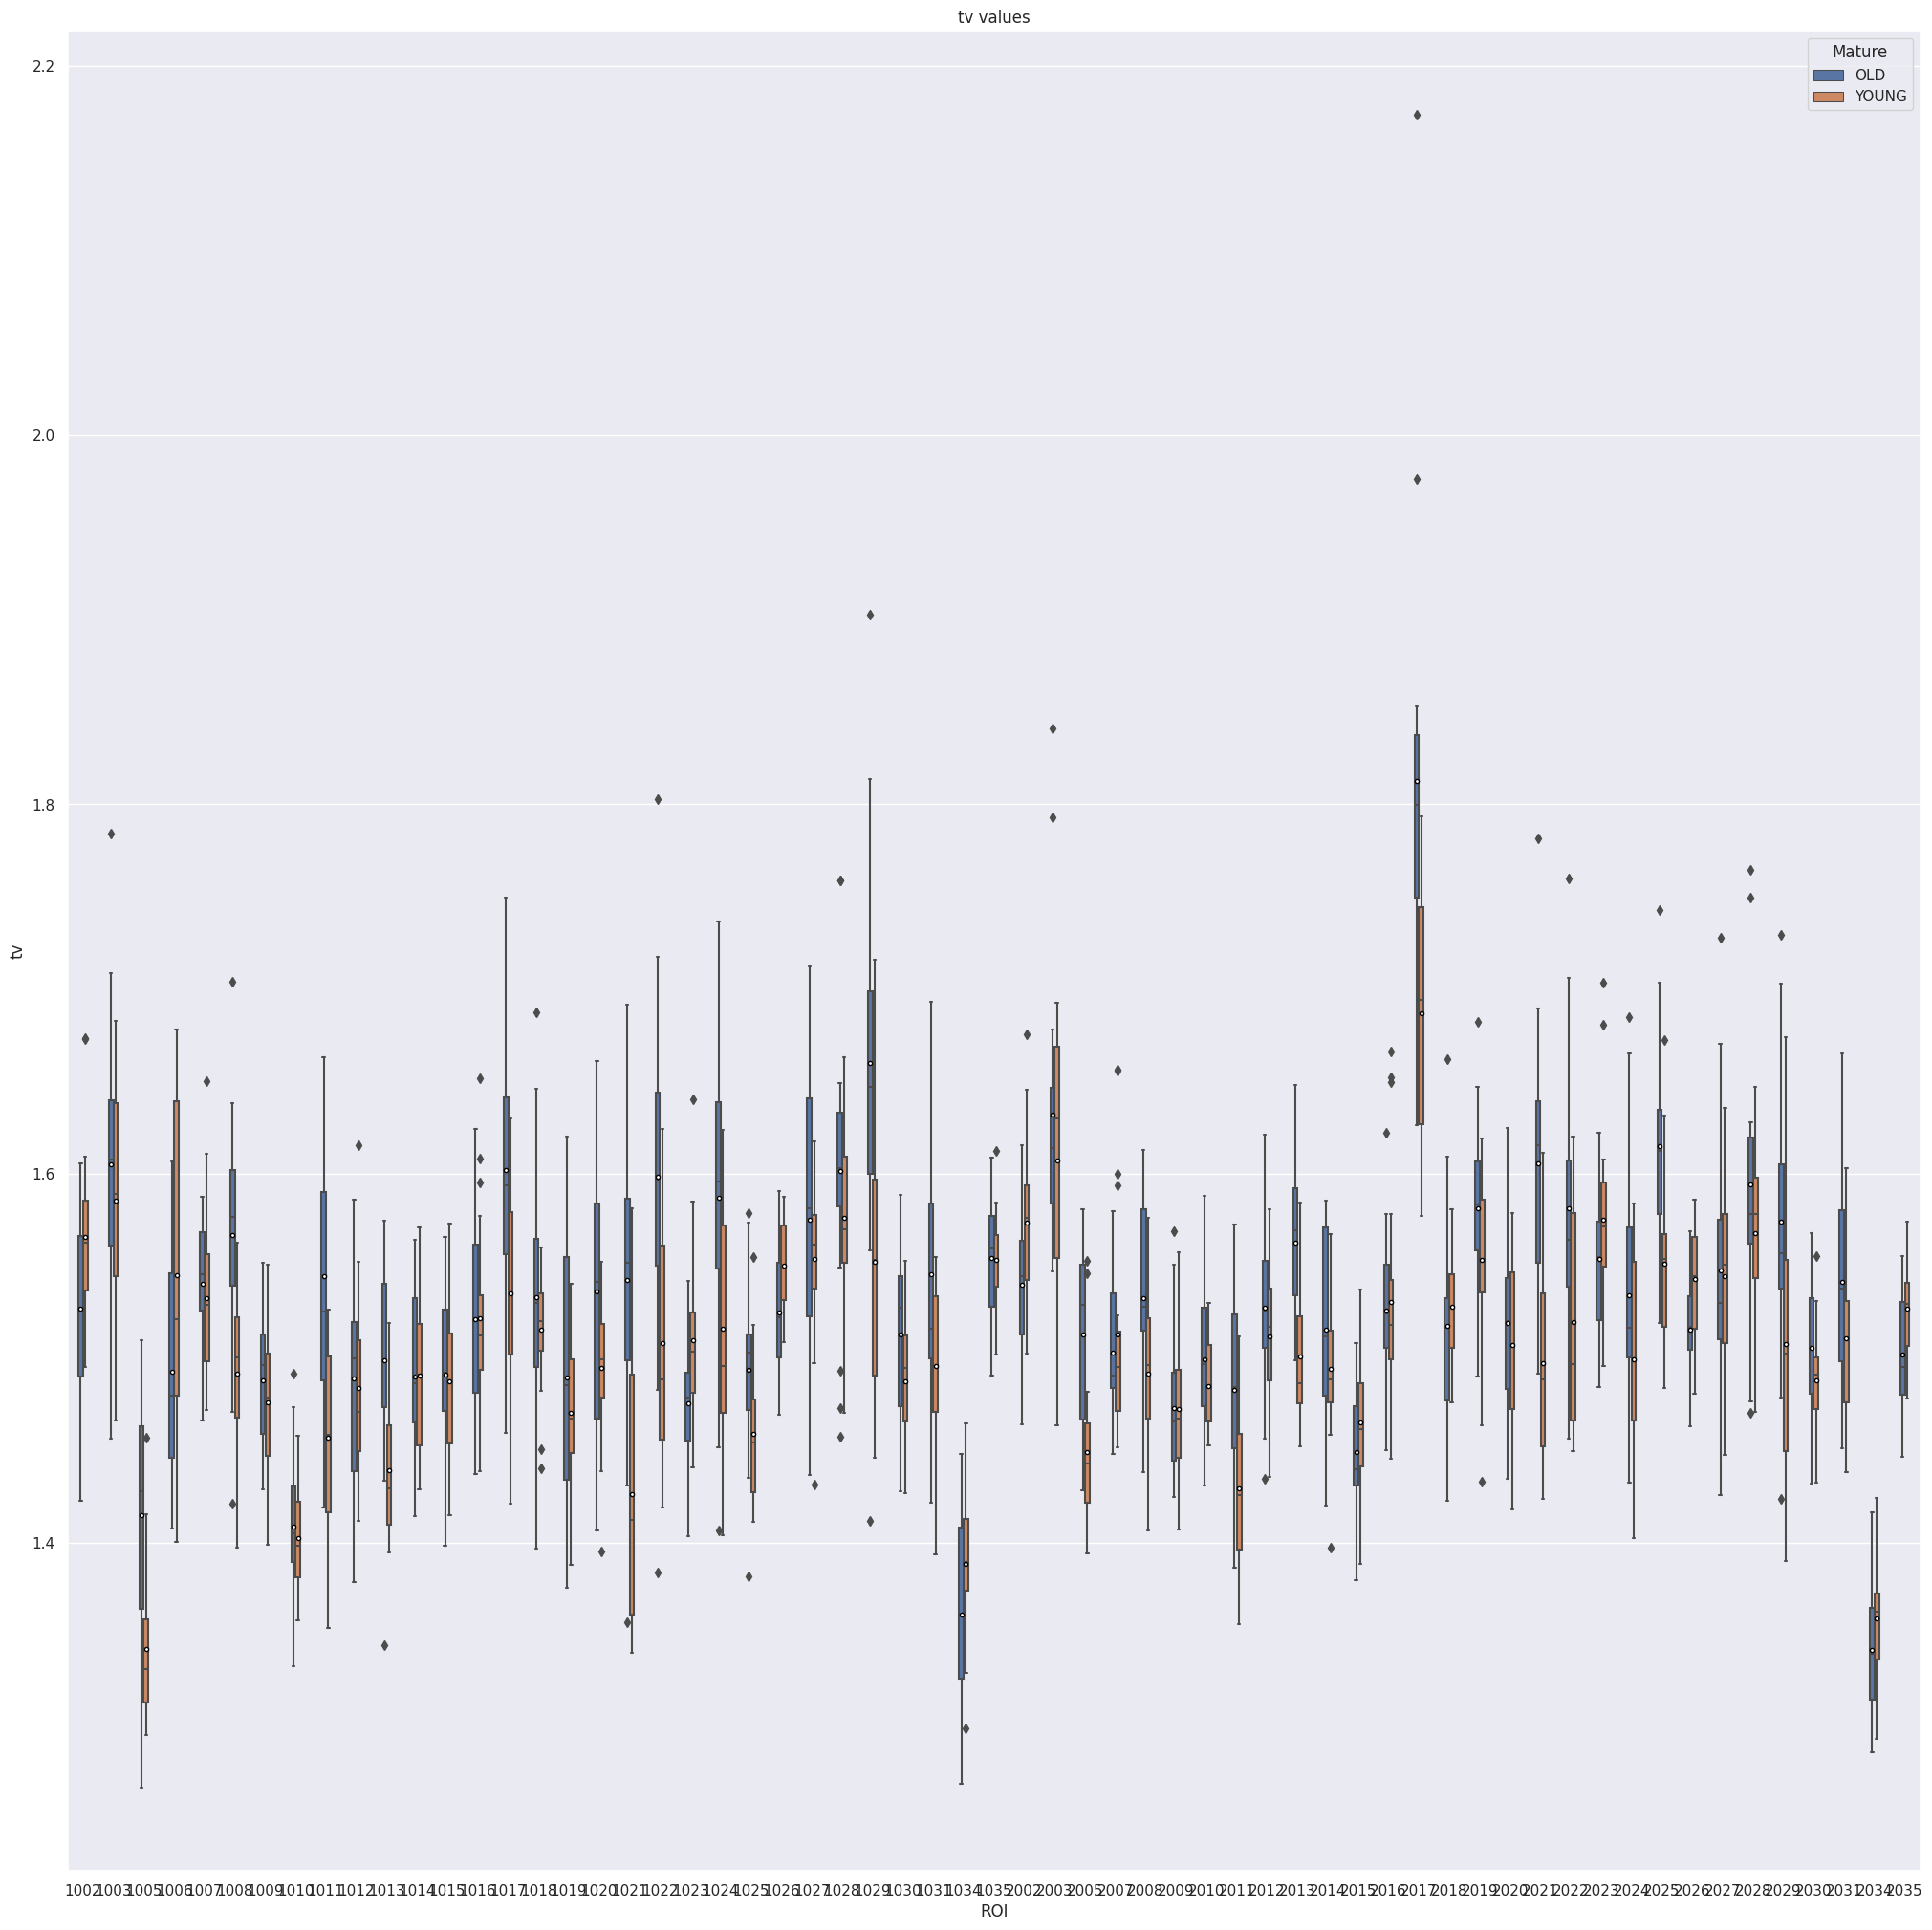

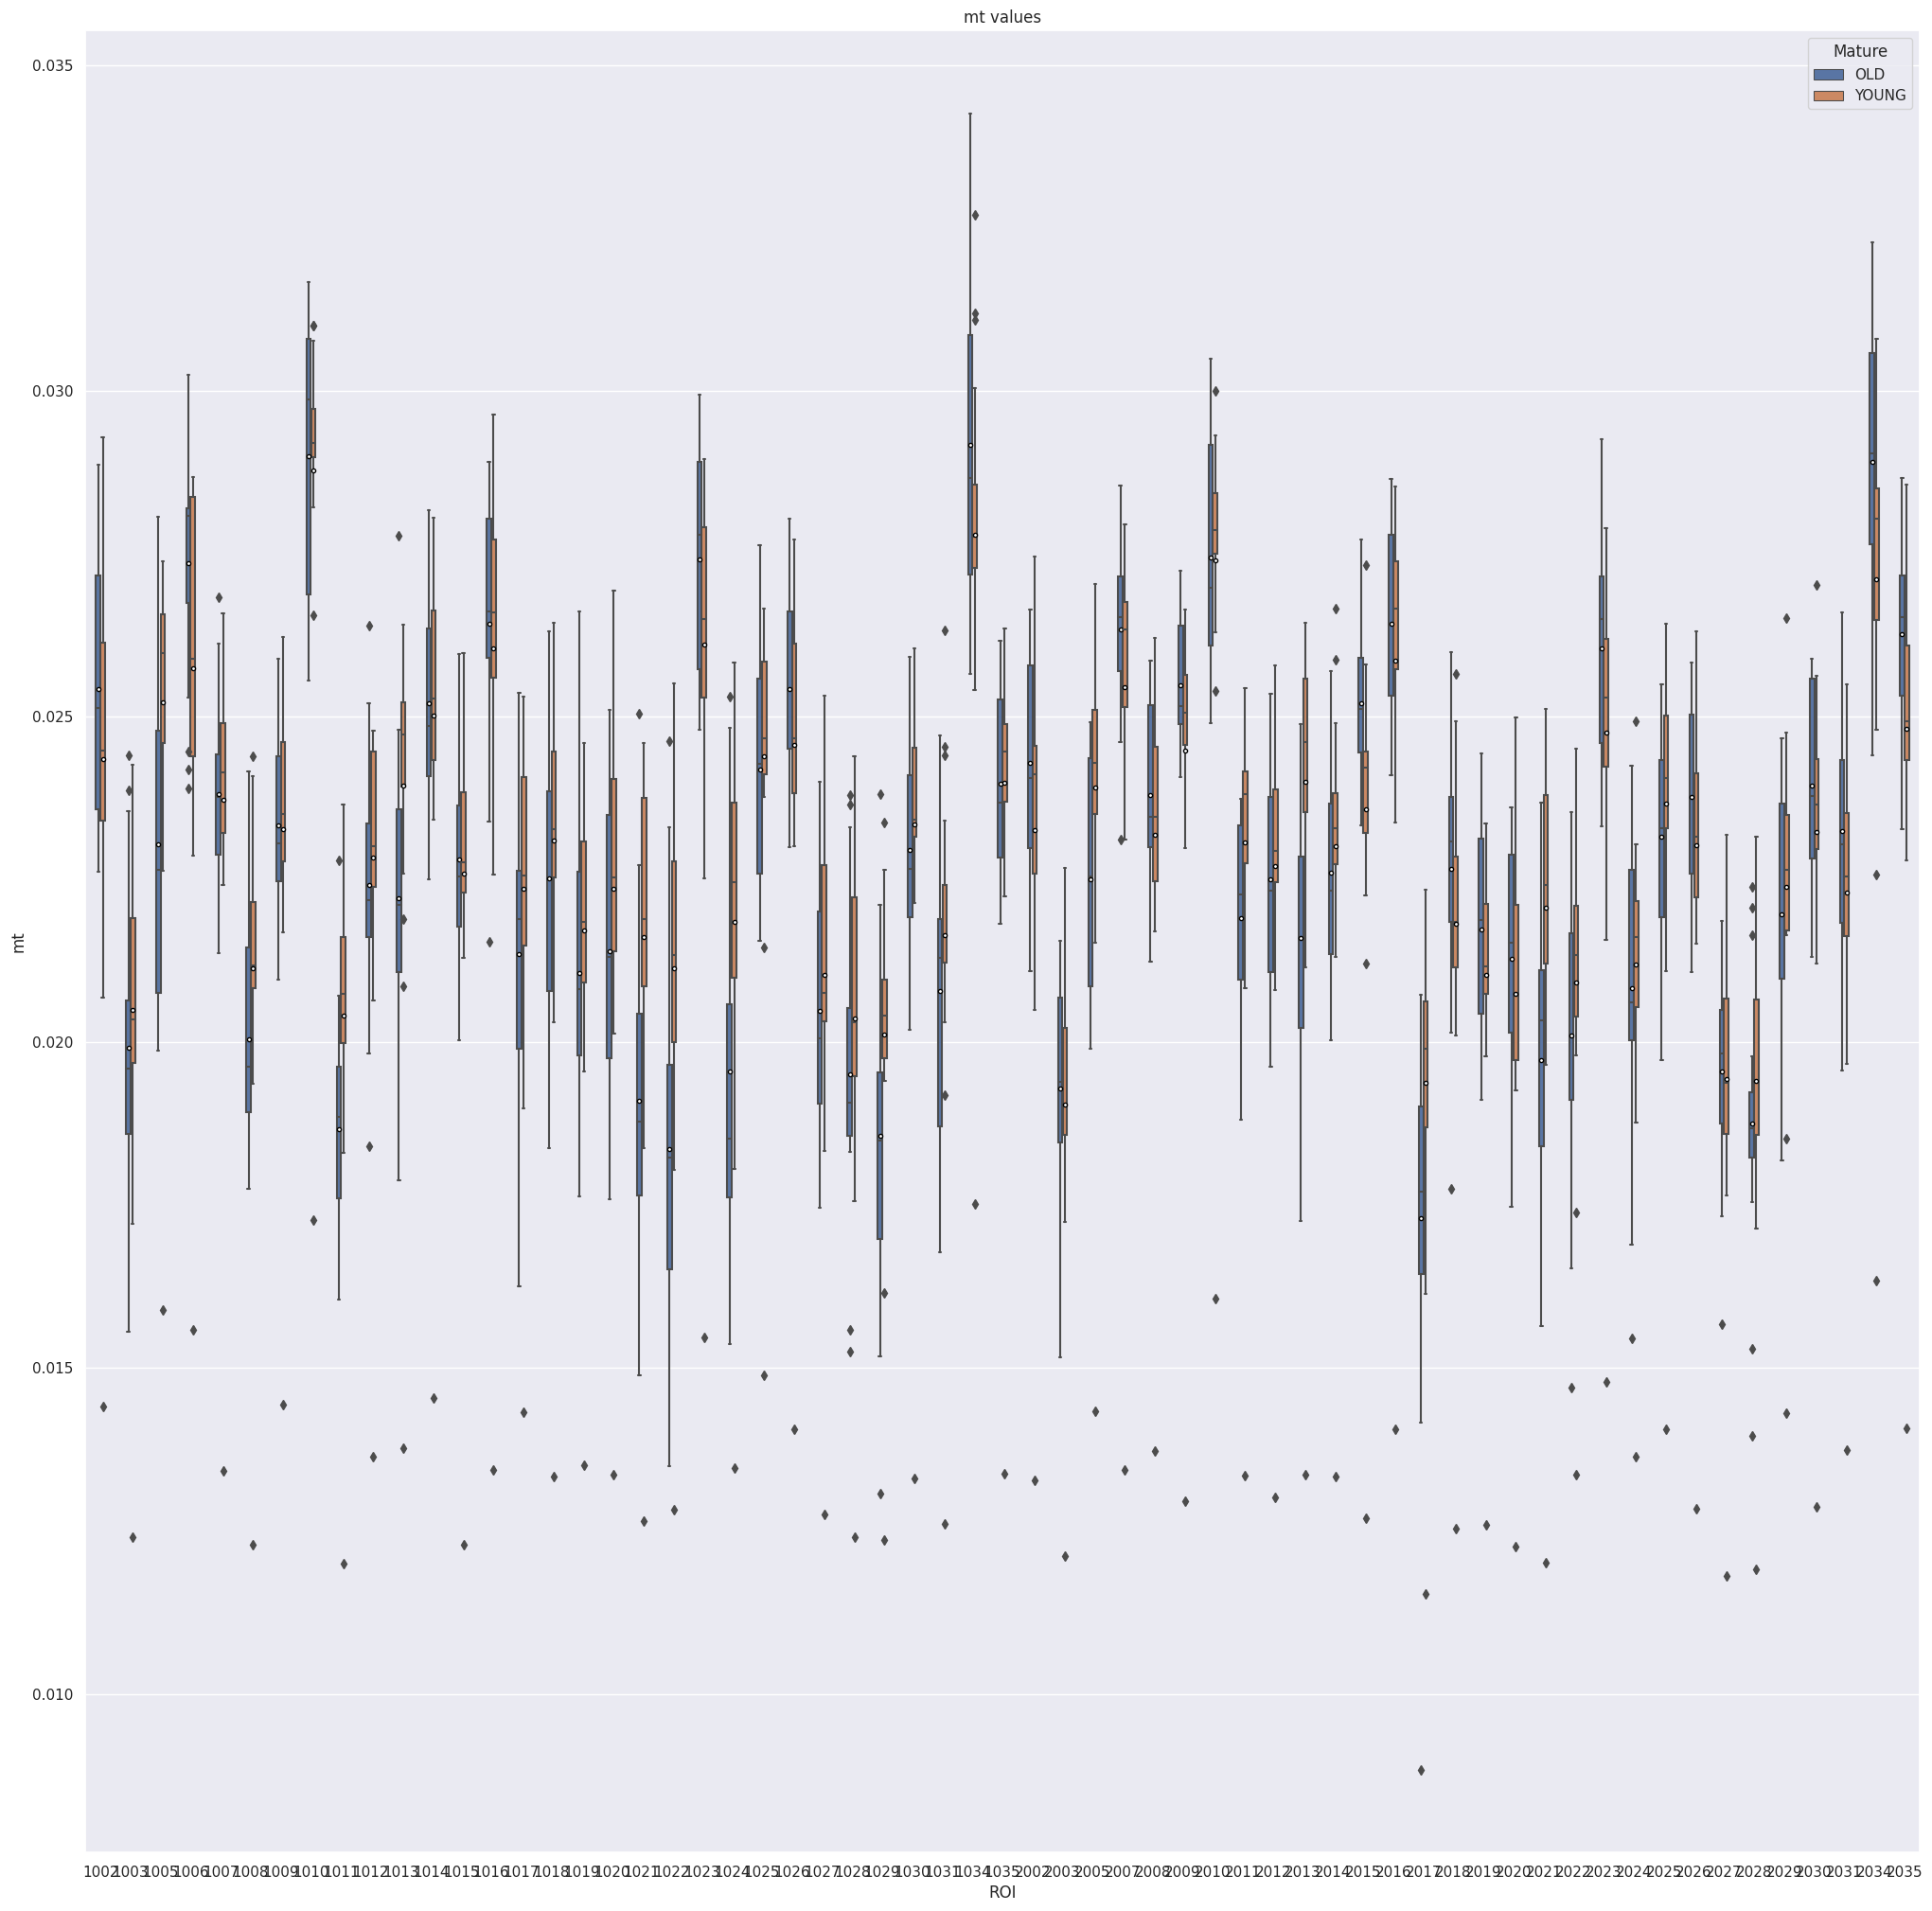

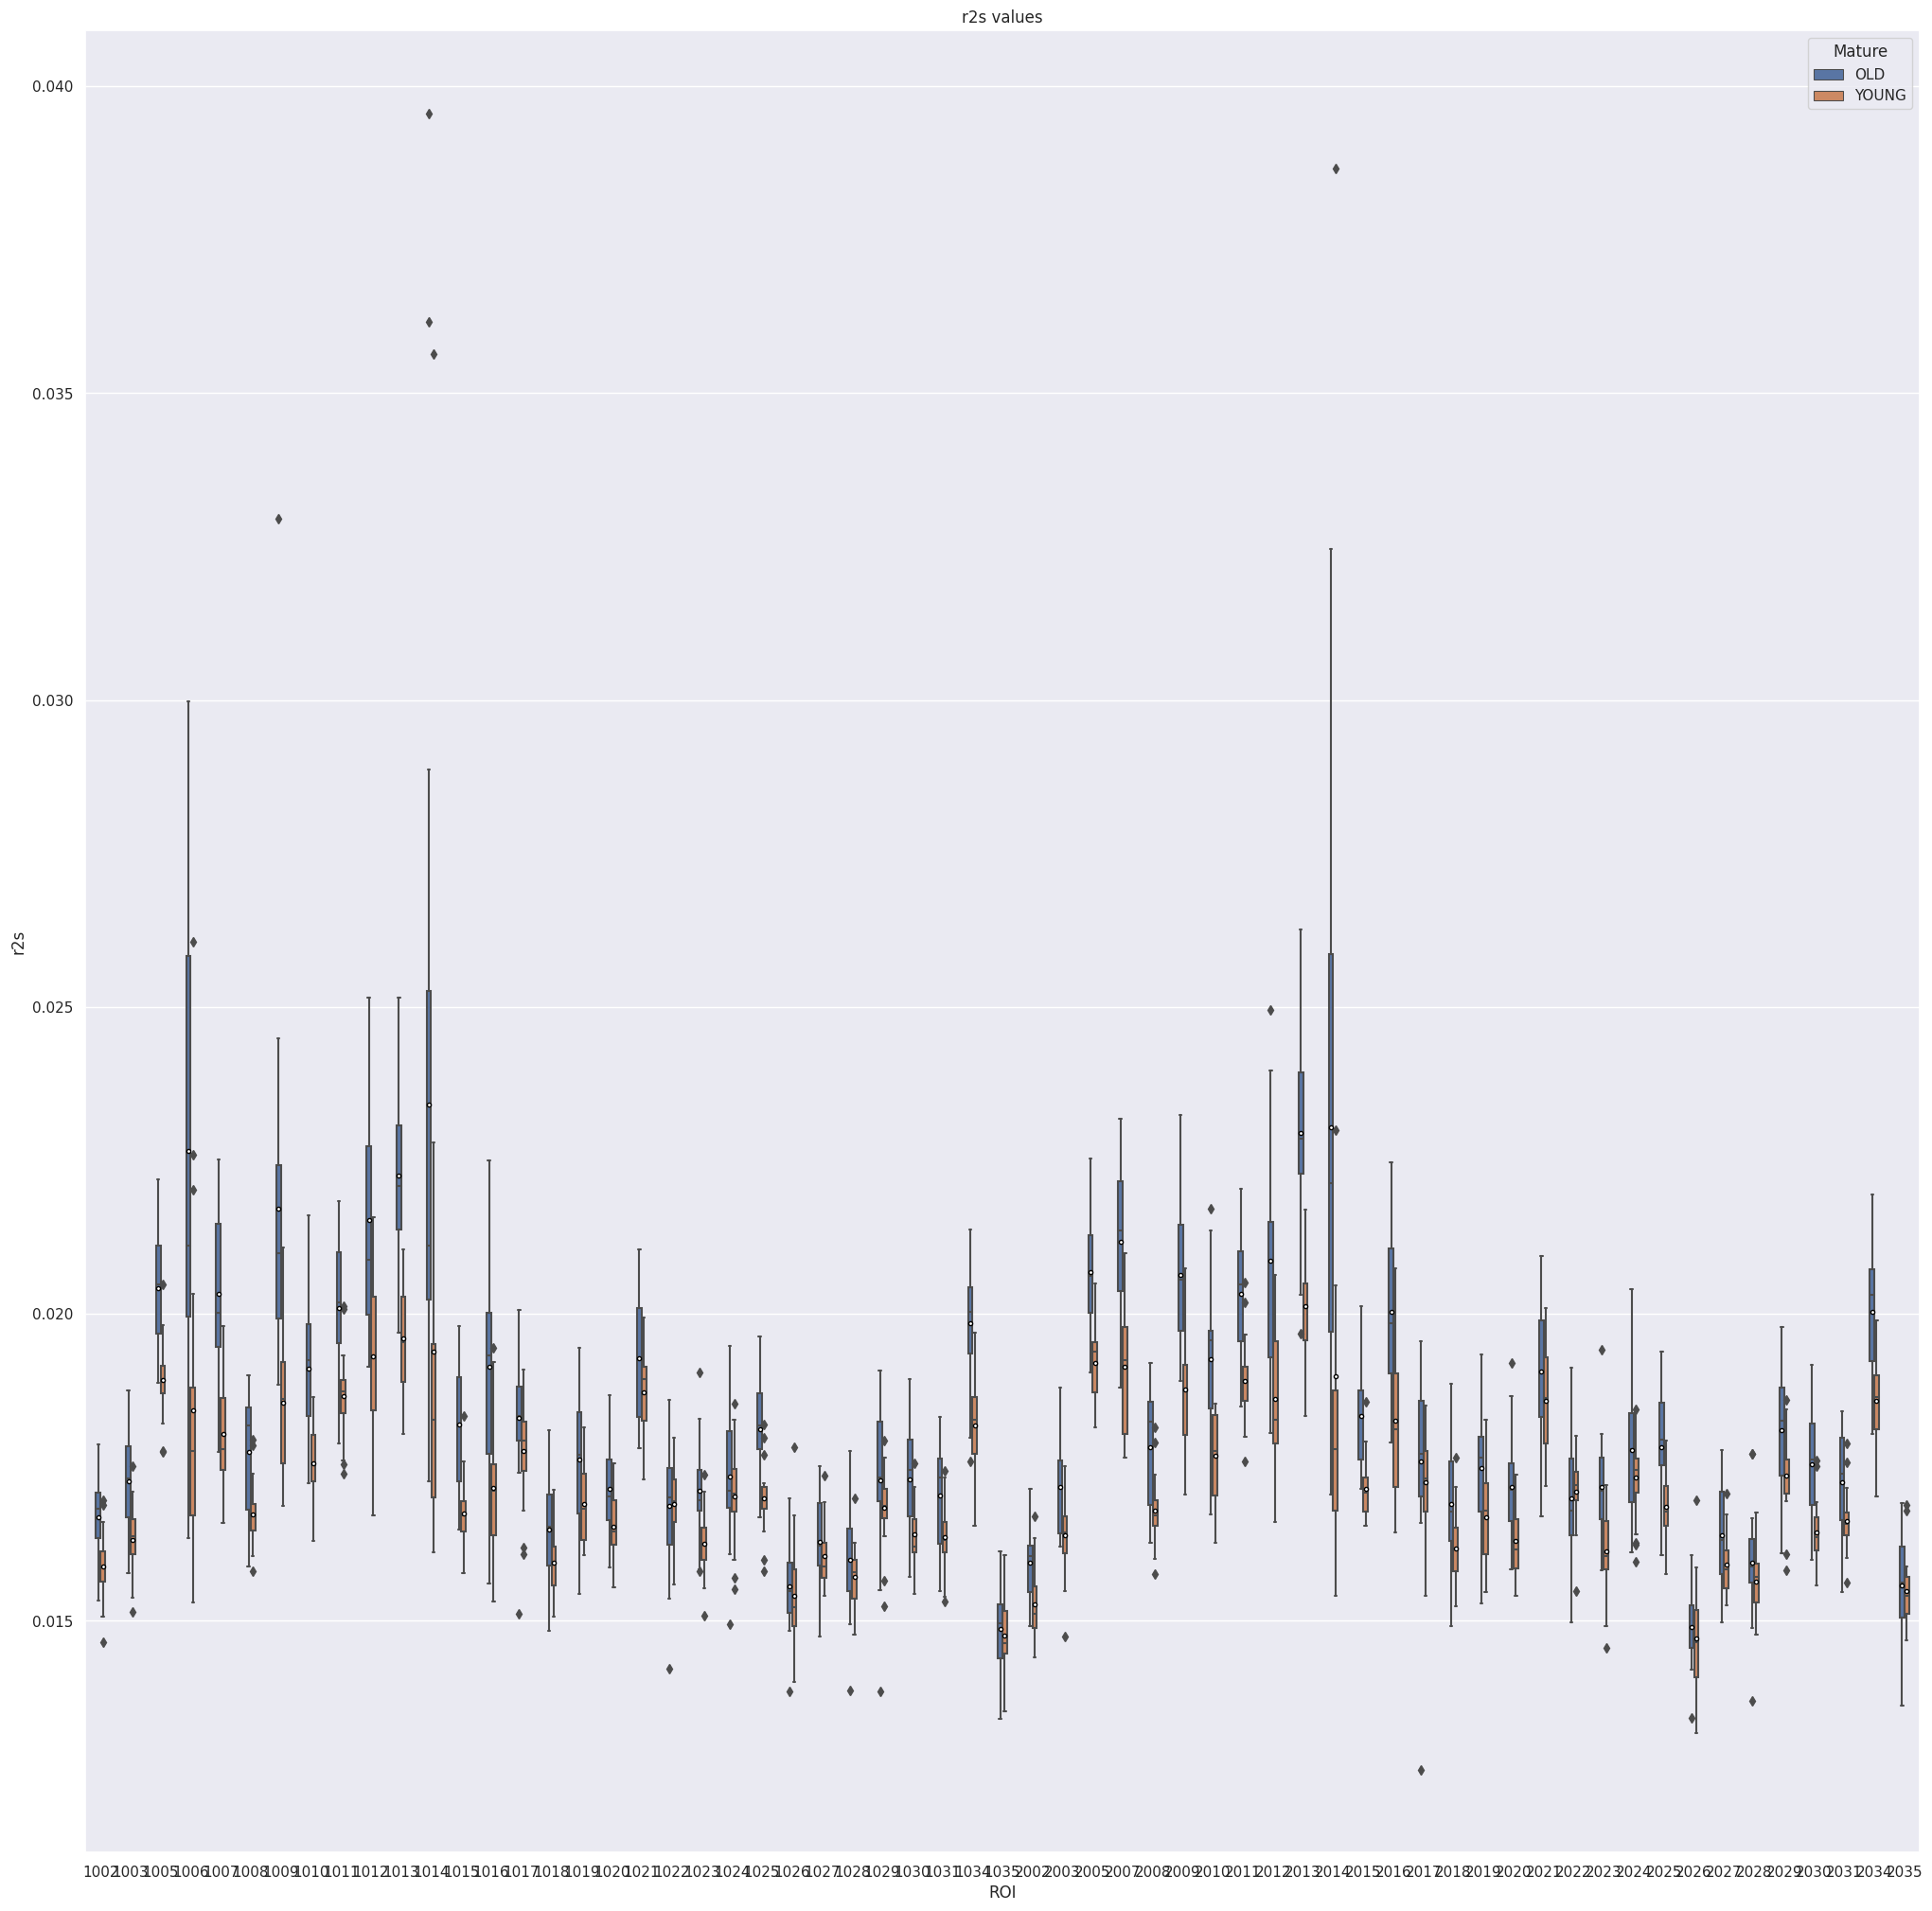

In [12]:
plt.close()
StatisticsWrapper.plot_data_per_param_per_roi_next_to_each_other(young_subjects, old_subjects,
                                                                    params_to_work_with,
                                                                    group_a_name, group_b_name)

In [51]:
r1_data = subjects_raw_data[~subjects_raw_data['subjects'].isin(outliers)]
r1_data = np.concatenate(subjects_raw_data['r1'].values)
r1_data = pd.Series(r1_data)

In [52]:
r1_outliers_data = subjects_raw_data[subjects_raw_data['subjects'].isin(outliers)]
r1_outliers_data = np.concatenate(r1_outliers_data['r1'].values)
r1_outliers_data = pd.Series(r1_outliers_data)

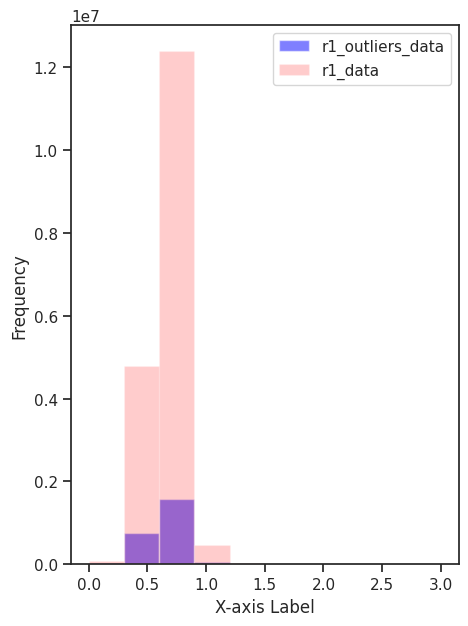

In [54]:
plt.figure(figsize=(5, 7))
plt.hist(r1_outliers_data, bins=10, range=[0, 3], color='blue', alpha=0.5, label='r1_outliers_data')
plt.hist(r1_data, bins=10, range=[0, 3], color='red', alpha=0.2, label='r1_data')
plt.xlabel('X-axis Label')
plt.ylabel('Frequency')
plt.legend()

In [12]:
subjects = chosen_data.groupby('subjects')
relevant_rois = list(chosen_data.ROI_name.unique())

def calculate_params_distances_of_subject(subject_df):
    df = subject_df['r1'].values
    dist = pdist(df.reshape(-1, 1), metric='euclidean')
    distance_matrix = pd.DataFrame(squareform(dist), index=relevant_rois, columns=relevant_rois)

    return distance_matrix


distances = subjects.apply(calculate_params_distances_of_subject)

In [13]:
subjects = chosen_data.groupby('subjects')

def calculate_rois_distances(data):
    relevant_rois = set(data.ROI)
    symmetric_rois, other_rois = create_rois_pairs(relevant_rois)
    pass

def create_rois_pairs(rois):
    symmetric_rois = set()
    other_rois = set() 

    for roi in relevant_rois:
        for roi_to_match in rois:
            if roi == roi_to_match + 1000 or roi == roi_to_match - 1000:
                symmetric_rois.add(sorted((roi, roi_to_match)))
            elif roi != roi_to_match:
                other_rois.add(sorted((roi, roi_to_match)))


    return symmetric_rois, other_rois

subjects.apply(calculate_rois_distances)


NameError: name 'relevant_rois' is not defined

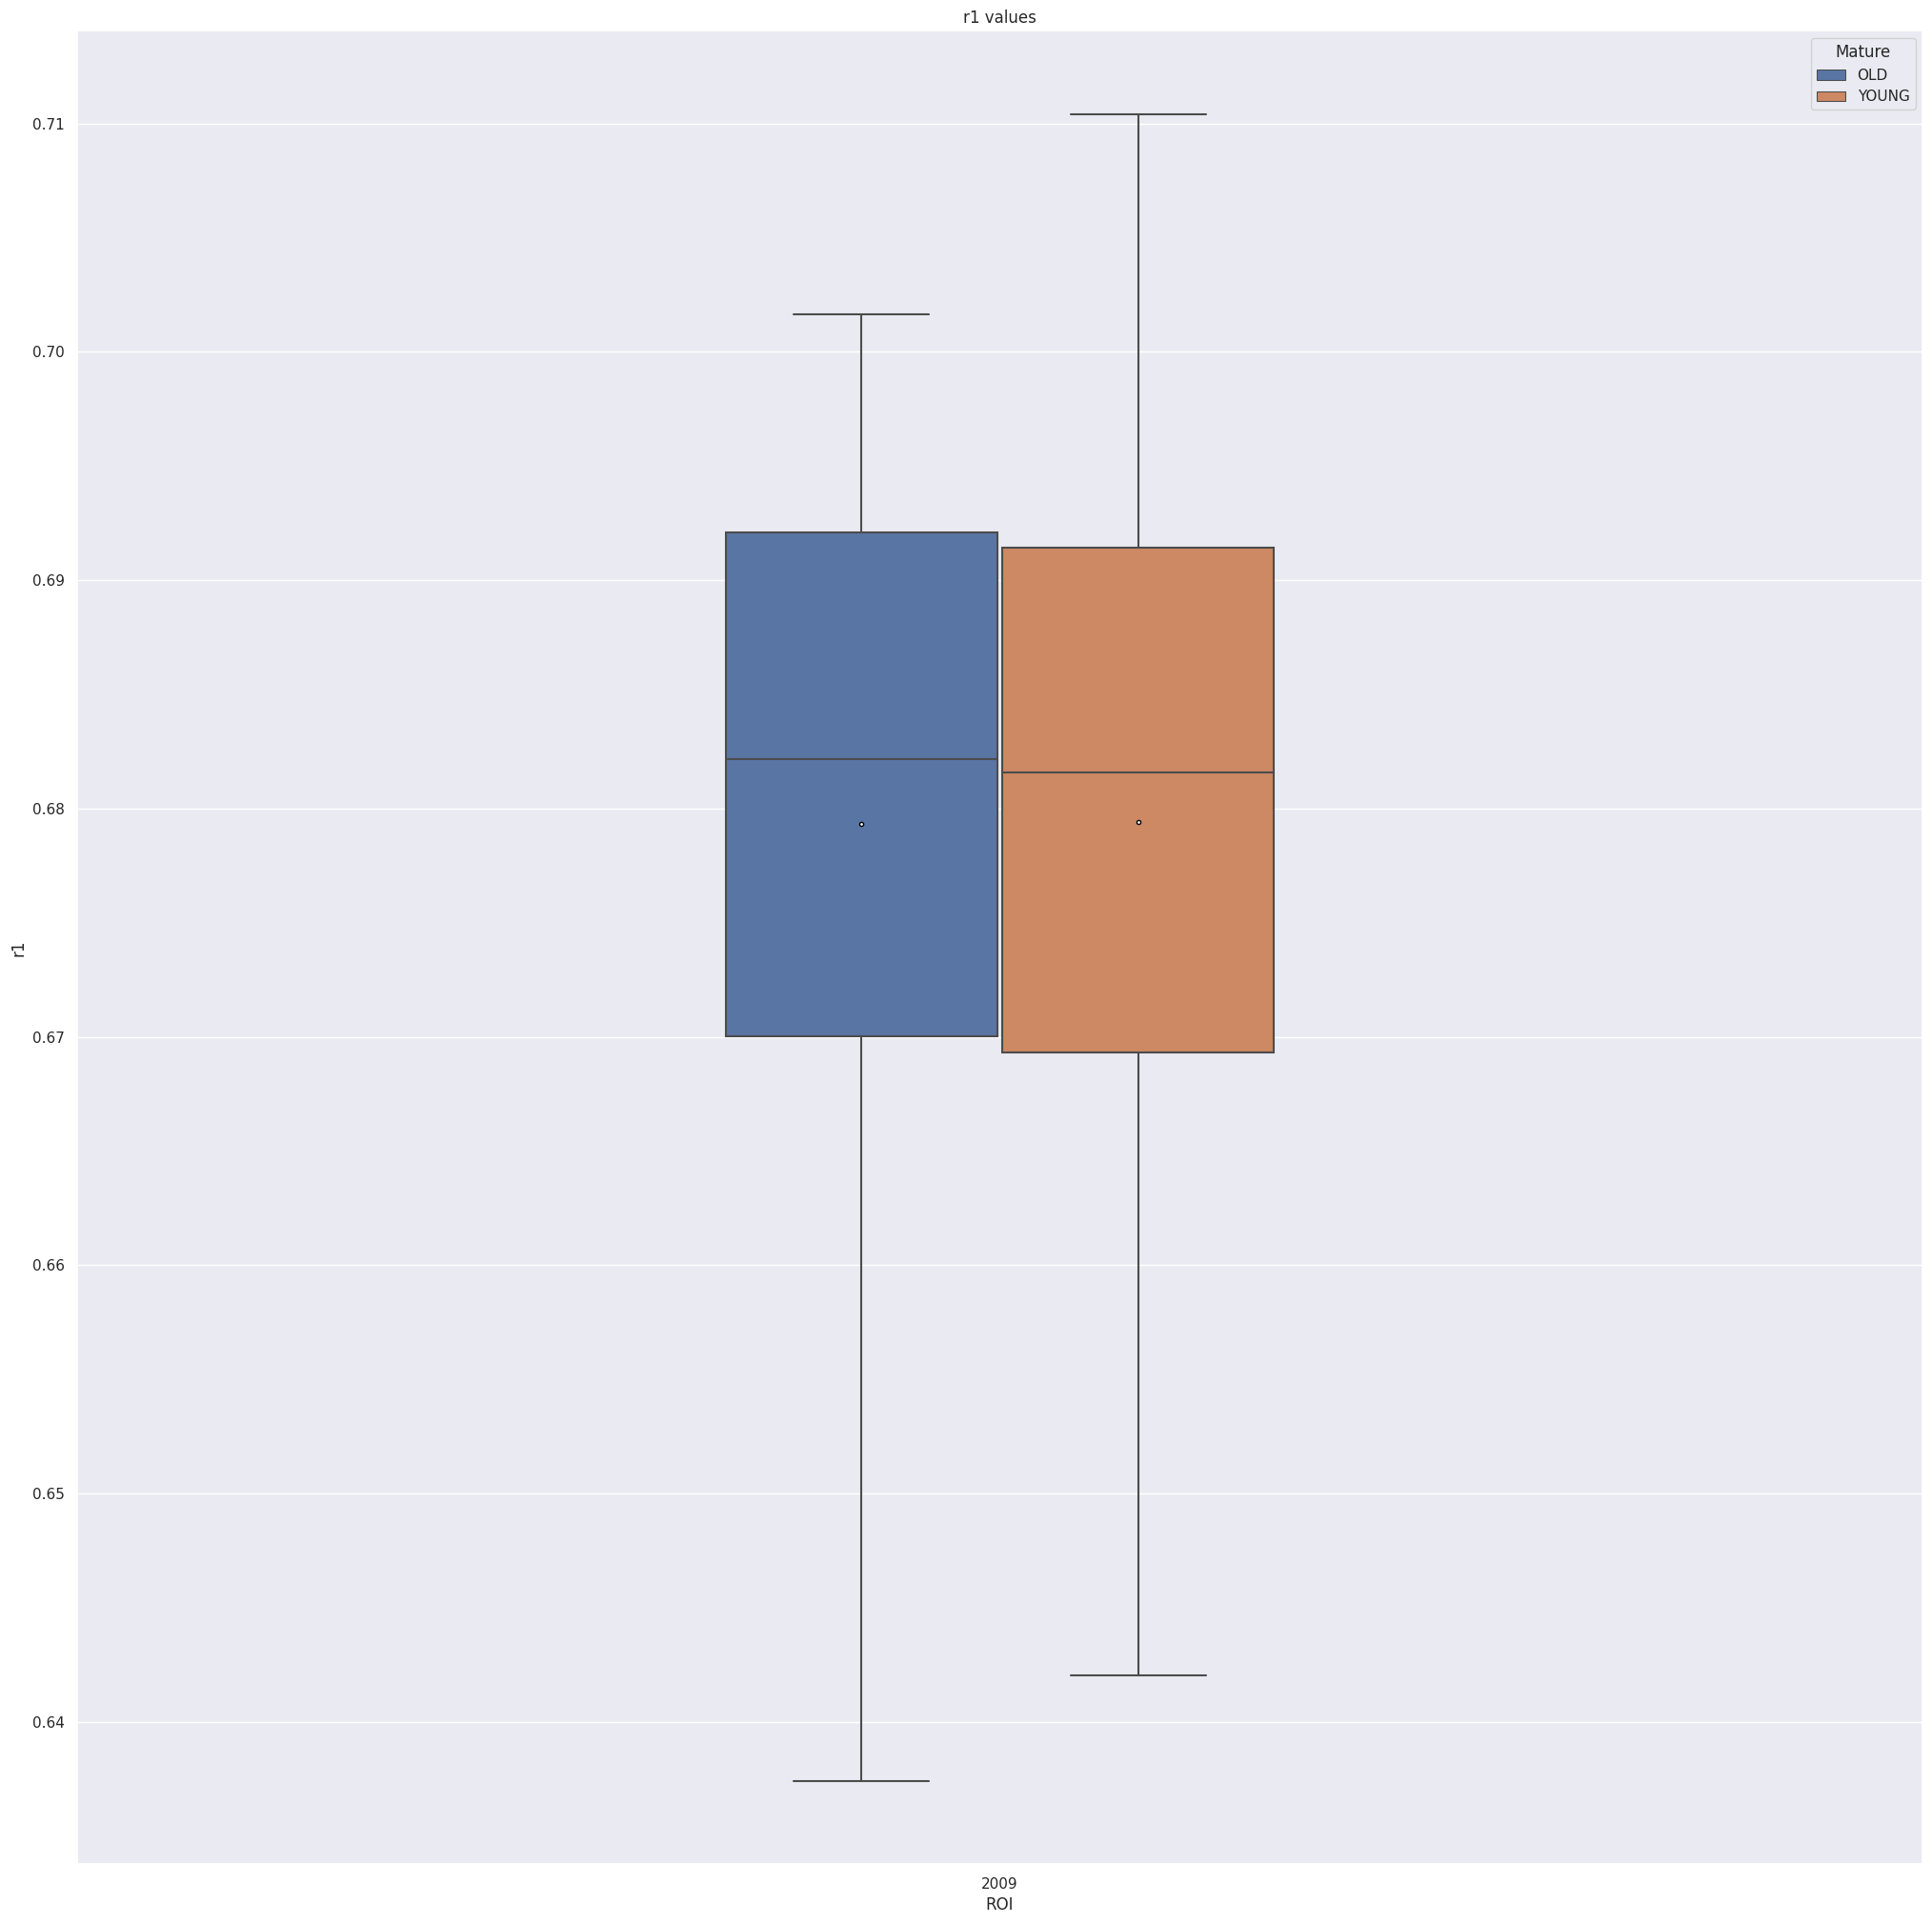

In [ ]:

roi_to_see = 2009
plt.close()
StatisticsWrapper.plot_data_per_param_per_roi_next_to_each_other(young_subjects[young_subjects.ROI == roi_to_see], old_subjects[old_subjects.ROI == roi_to_see],
                                                                    ['r1'],
                                                                    group_a_name, group_b_name)

In [25]:
def extract_outliers(data, param):
     outliers = []
     threshold = 2.5

     for roi_value, roi_name in chosen_rois_dict.items():
          roi_to_check_data = data[data.ROI == roi_value]
          Q1 = roi_to_check_data[param].quantile(0.25)
          Q3 = roi_to_check_data[param].quantile(0.75)
          IQR = Q3 - Q1


          outliers_df = roi_to_check_data[(roi_to_check_data[param] < Q1 - threshold * IQR) | (roi_to_check_data[param] > Q3 + threshold * IQR)]

          if outliers_df.subjects.values.size > 0:
               outliers += outliers_df.subjects.tolist()

     return set(outliers)

In [27]:
for param in params_to_work_with:
    outliers = extract_outliers(chosen_data, param)
    print(f'{param} outliers: {outliers}')

r1 outliers: {'H023_IN', 'H050_AB', 'H053_ED', 'H056_LE'}
tv outliers: {'H023_IN', 'H050_AB', 'H053_ED', 'H056_LE'}
mt outliers: {'H023_IN', 'H056_LE', 'H030_NS', 'H032_JD'}
r2s outliers: {'H023_IN', 'H041_VG', 'H024_YG', 'H051_YK', 'H021_DH', 'H039_JH'}


In [ ]:
new_data = chosen_data[~chosen_data.subjects.isin(list(set(outliers)))]
new_young_subjects, new_old_subjects = StatisticsWrapper.seperate_data_to_two_groups(new_data, col_divider, threshold)

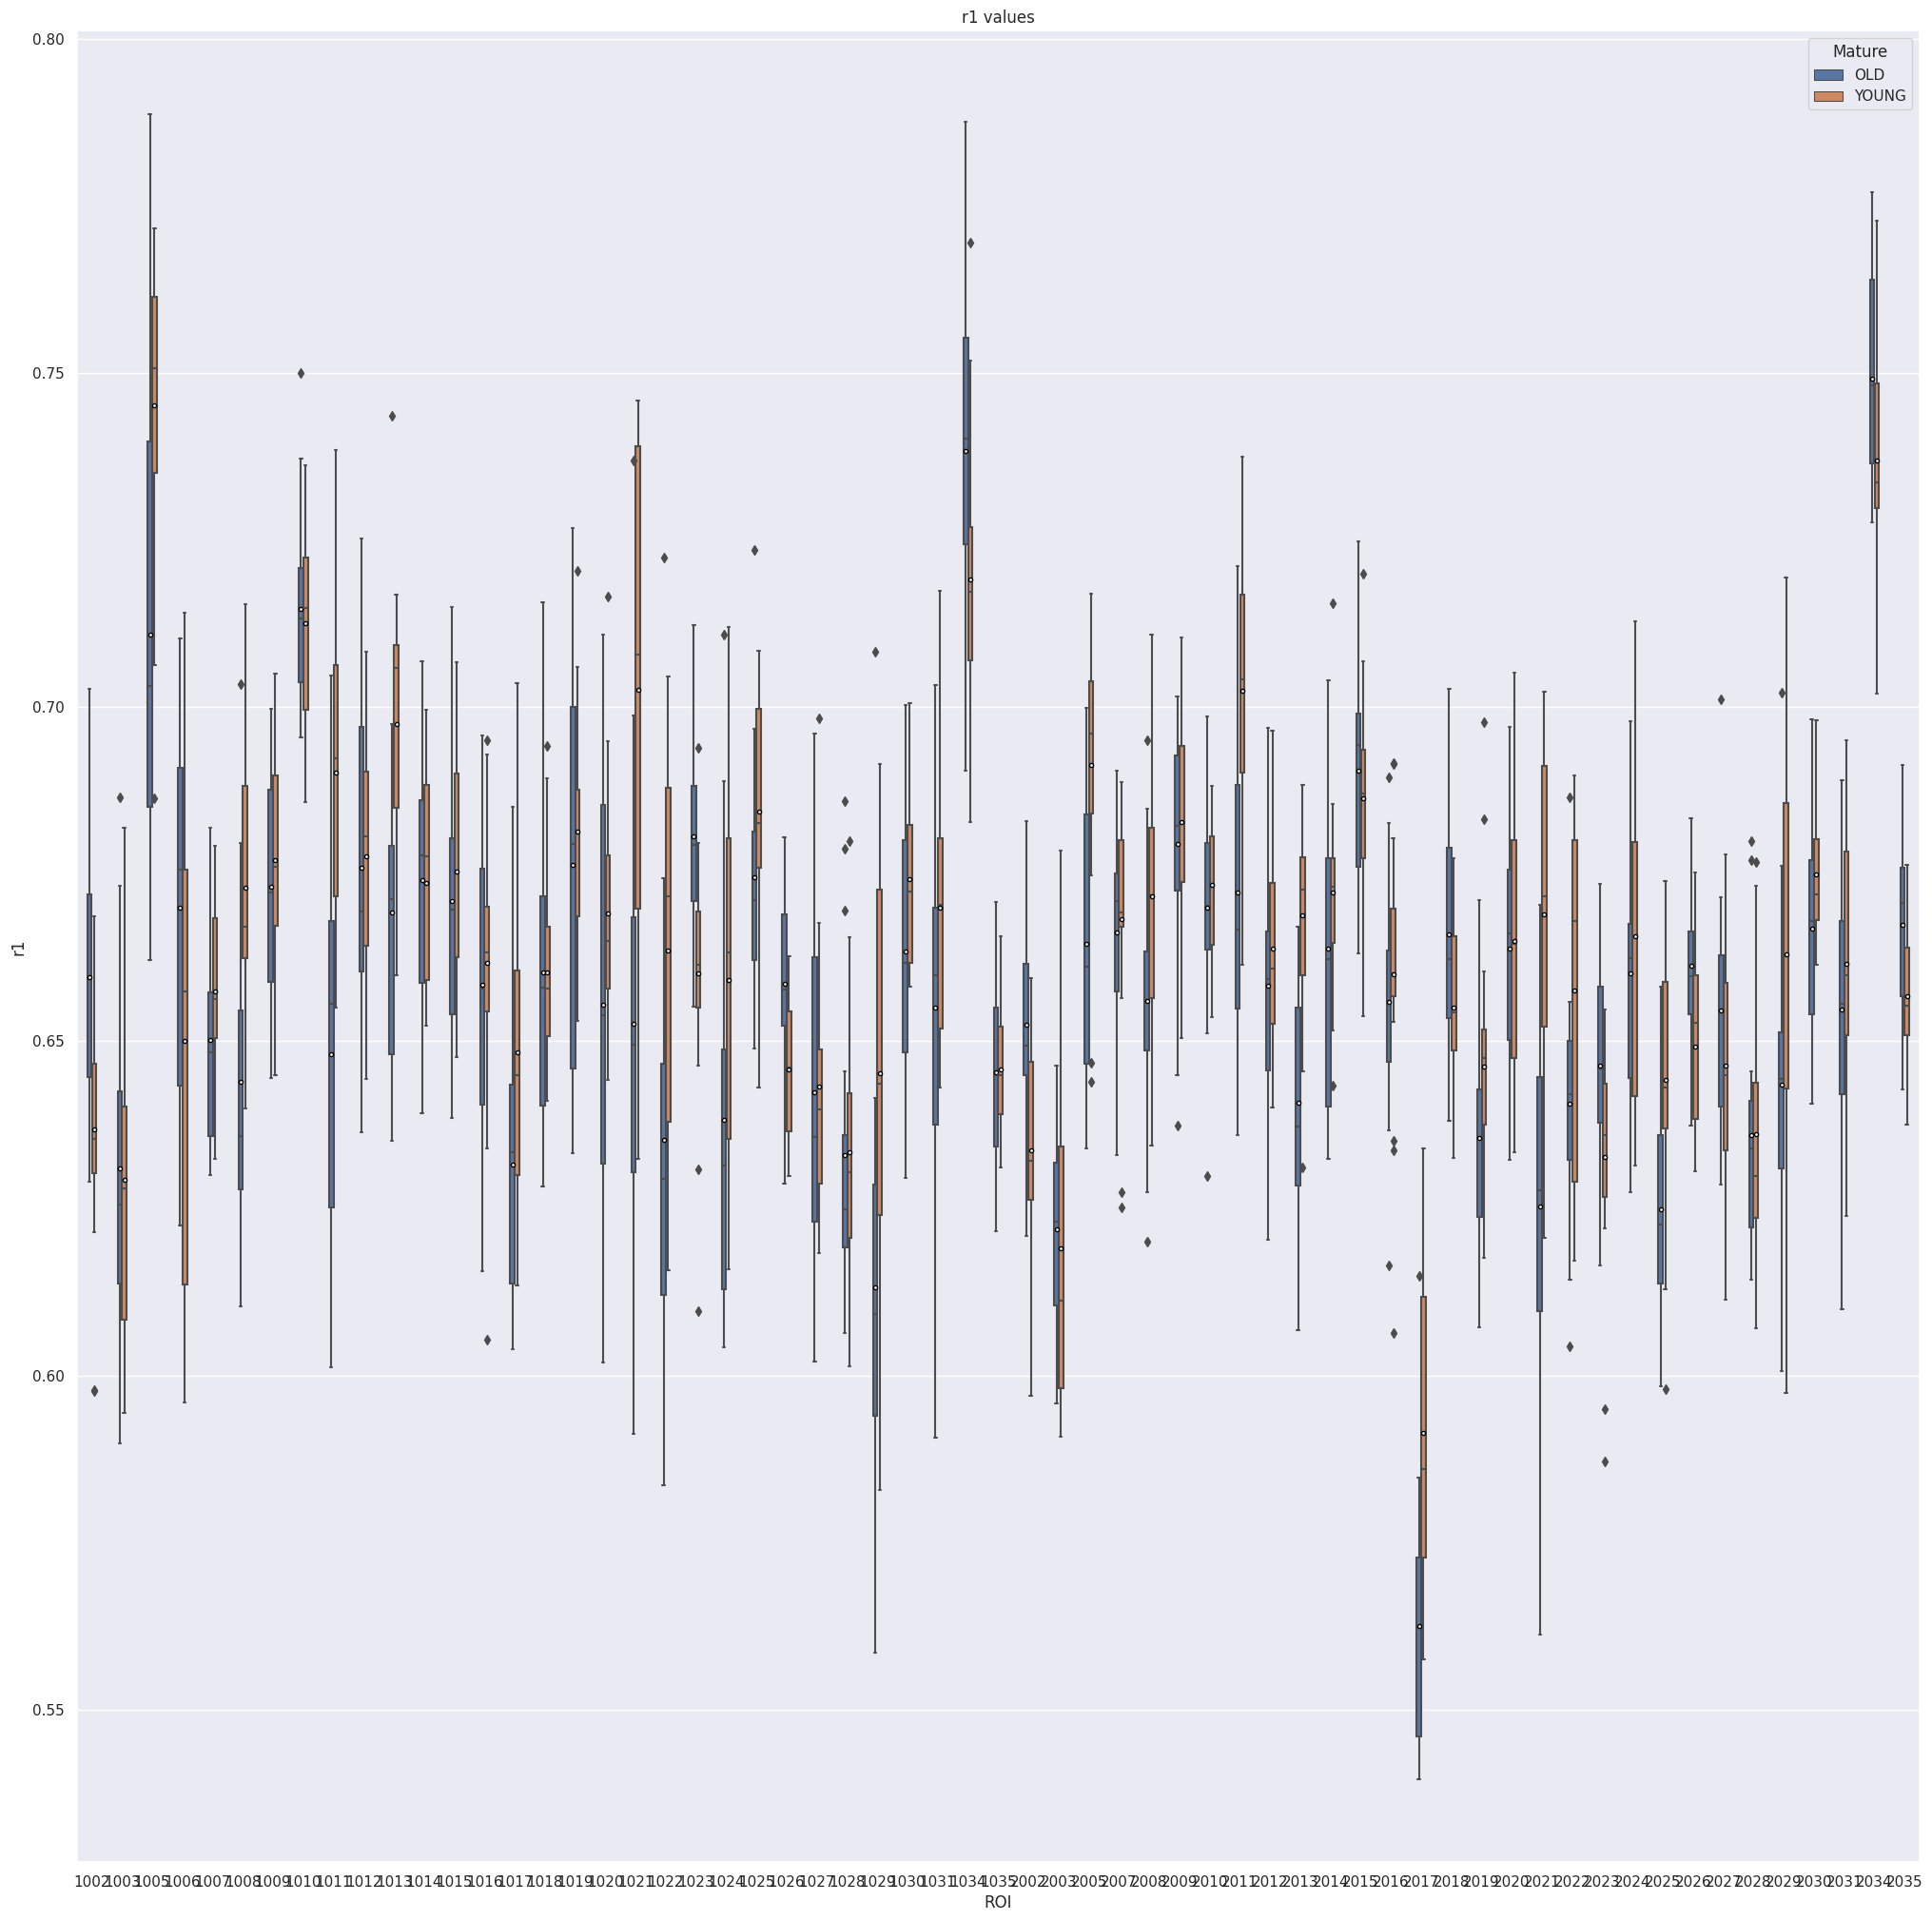

In [ ]:
plt.close()
StatisticsWrapper.plot_data_per_param_per_roi_next_to_each_other(new_young_subjects, new_old_subjects,
                                                                    ['r1'],
                                                                    group_a_name, group_b_name)

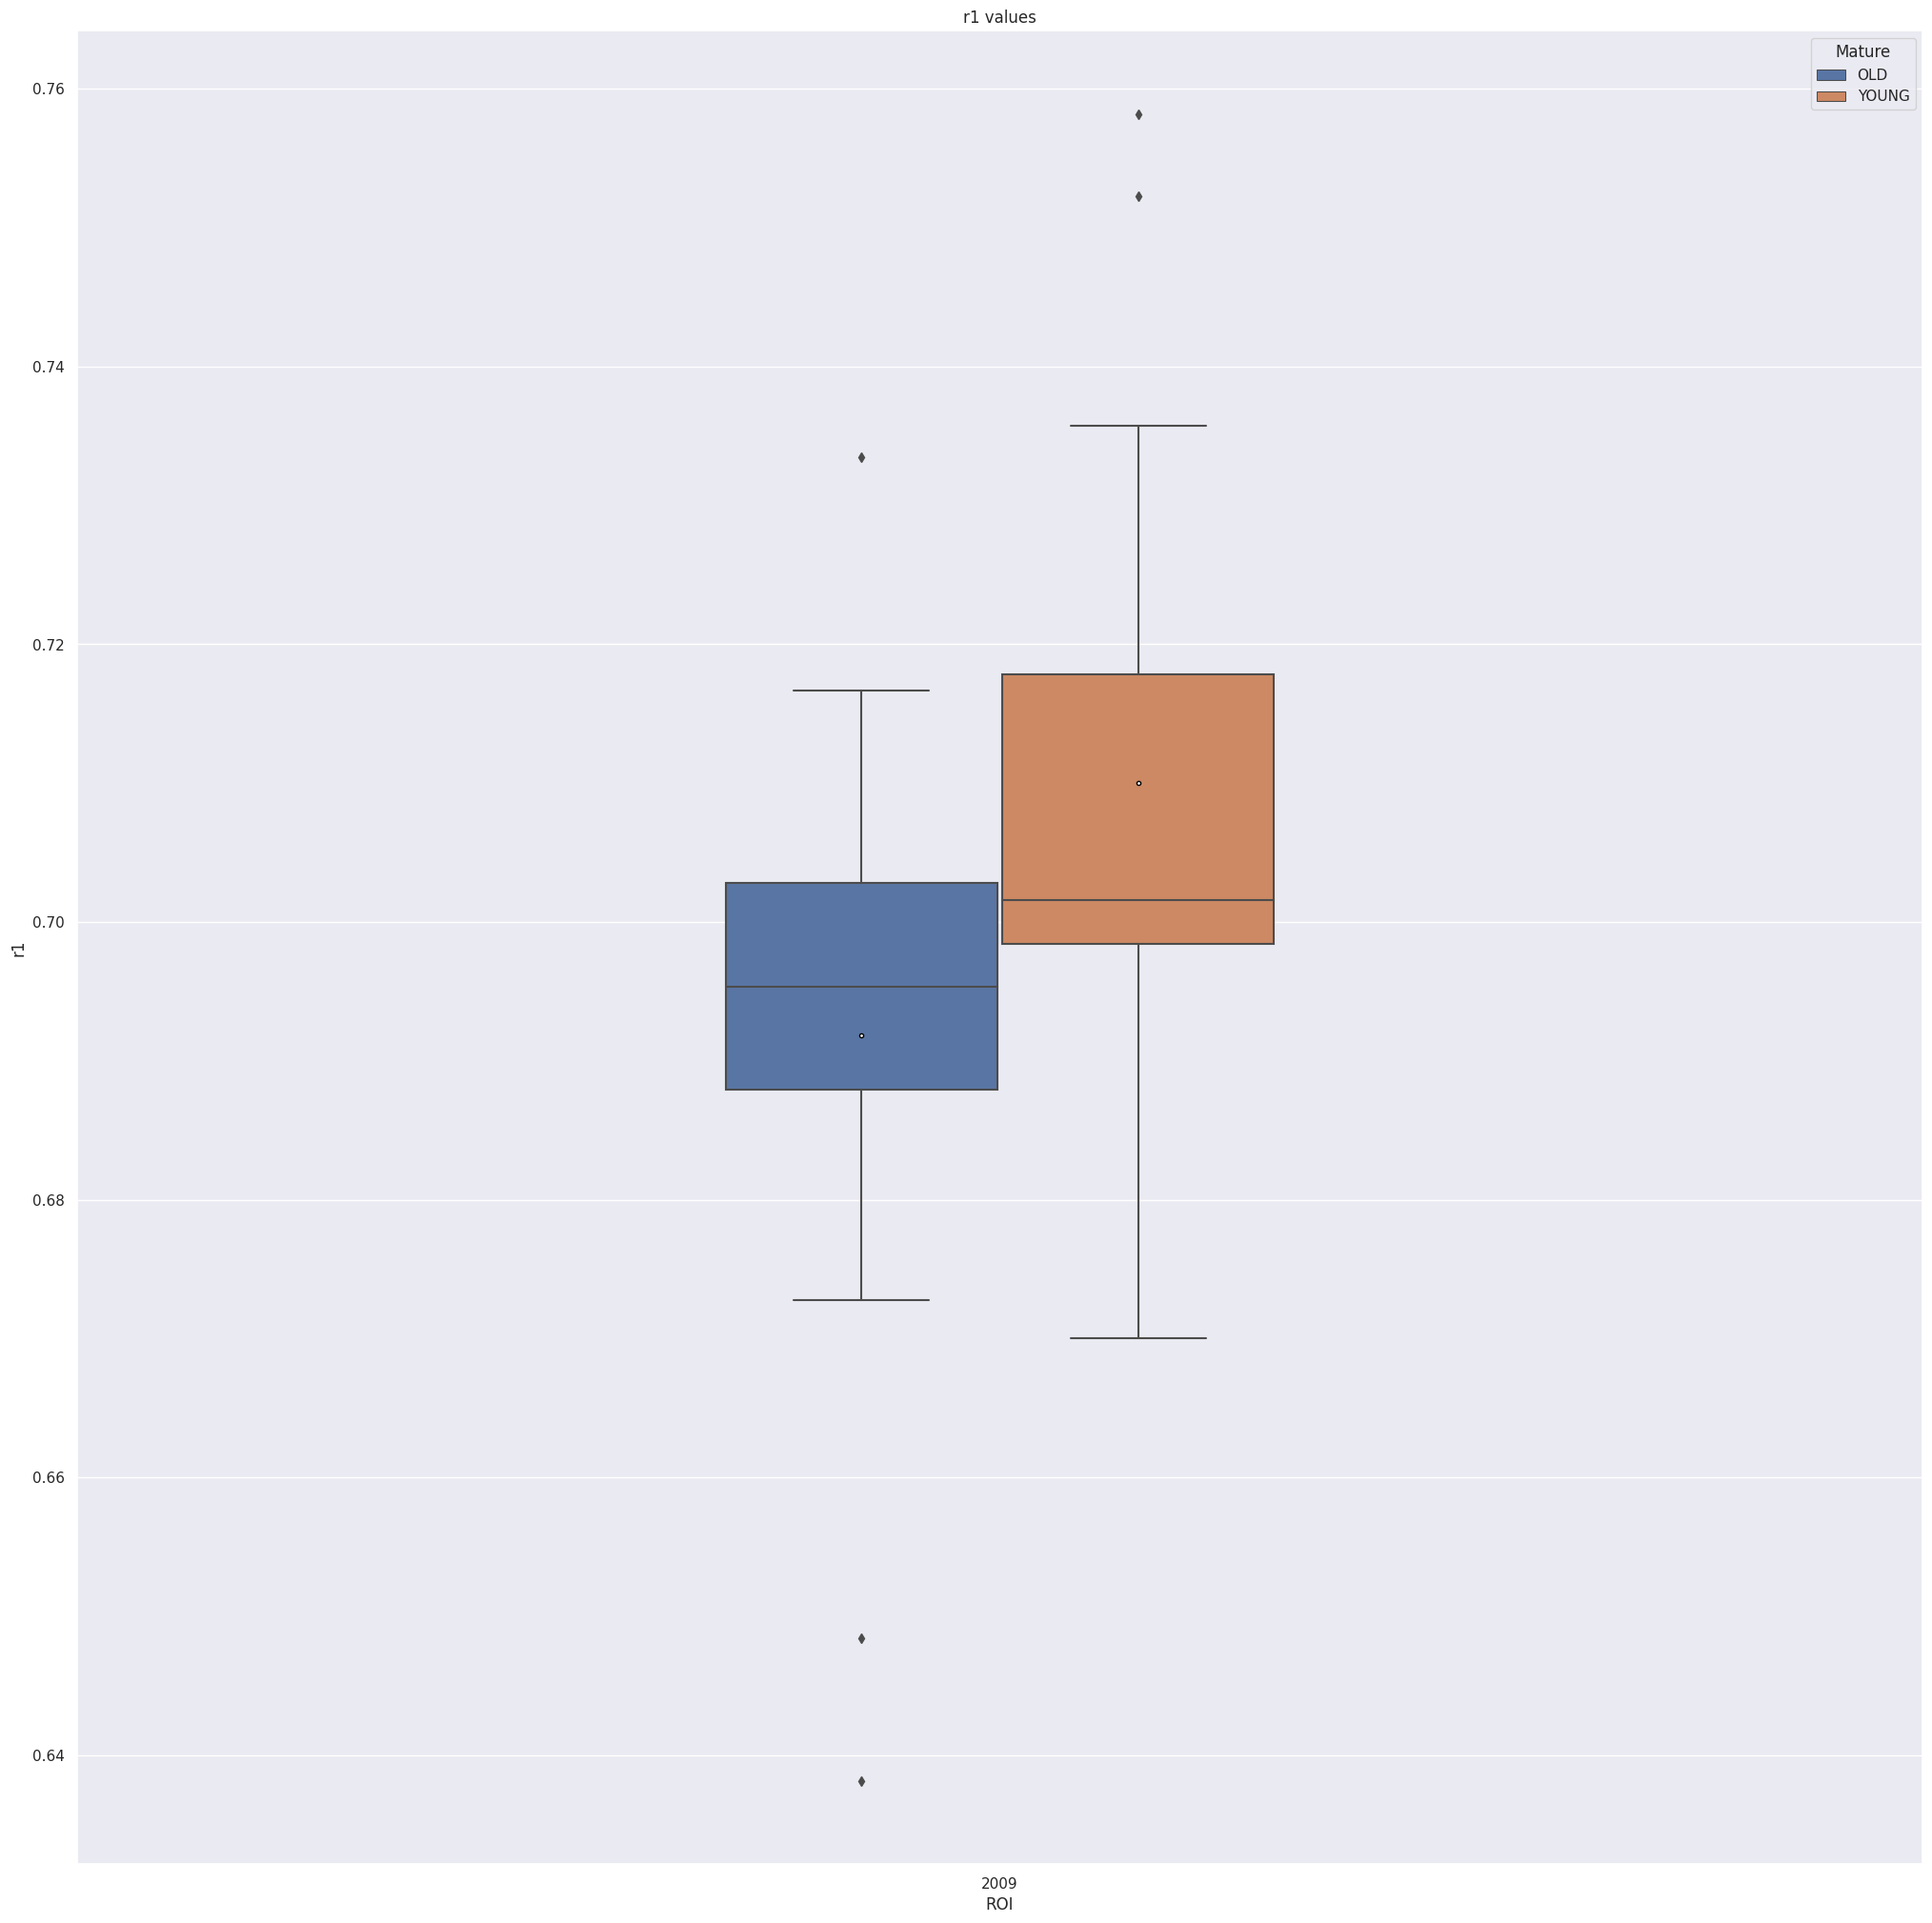

In [ ]:
plt.close()
StatisticsWrapper.plot_data_per_param_per_roi_next_to_each_other(new_young_subjects[new_young_subjects.ROI == roi_to_see], new_old_subjects[new_old_subjects.ROI == roi_to_see],
                                                                    ['r1'],
                                                                    group_a_name, group_b_name)

In [ ]:
data_path = os.path.join(constants.ANALYSIS_DIR, outliers[0])
seg_path = os.path.join(data_path, os.listdir(data_path)[0], constants.BASIC_SEG)
brain_path = os.path.join(data_path, os.listdir(data_path)[0], constants.MAP_R1)

In [ ]:
os.system(f'freeview -v {brain_path} {seg_path}:colormap=lut &')